<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [813]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

## B. Load and understand the dataset

In [814]:
# put your answer here
df = pd.read_excel('./personality.xlsx')


1. Display the summary of all the features of the dataset using `.info()`

In [815]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [816]:
# put your answer here
print("\n =====POST FREQUENCY==== \n",df['Post/Share Frequently?'].value_counts())
print("\n =====ACTIVE==== \n",df['Active in social media?'].value_counts())
print("\n =====REPLIES TO COMMENT==== \n",df['Replies to comments?'].value_counts())
print("\n =====NUMBER OF FRIENDS==== \n",df['Number of friends/followers'].value_counts())
print("\n =====PERSONALITY==== \n",df['Personality'].value_counts())


 =====POST FREQUENCY==== 
 Post/Share Frequently?
0    29
1    21
Name: count, dtype: int64

 =====ACTIVE==== 
 Active in social media?
1    38
0    12
Name: count, dtype: int64

 =====REPLIES TO COMMENT==== 
 Replies to comments?
1    29
0    21
Name: count, dtype: int64

 =====NUMBER OF FRIENDS==== 
 Number of friends/followers
1500    3
1300    2
1000    2
1100    2
2500    2
1700    2
2200    2
2000    2
524     1
319     1
624     1
2700    1
991     1
608     1
1600    1
355     1
790     1
323     1
571     1
724     1
970     1
413     1
803     1
576     1
284     1
339     1
592     1
1400    1
670     1
707     1
138     1
1200    1
830     1
226     1
169     1
999     1
19      1
554     1
762     1
262     1
142     1
Name: count, dtype: int64

 =====PERSONALITY==== 
 Personality
1    28
0    22
Name: count, dtype: int64


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [817]:
# put your answer here
df = pd.read_excel('./personality.xlsx')
X = df.drop(columns=["Name", "Personality"]).values

# np.split(df)
print(X)

[[   1    1    1  524]
 [   0    1    1  355]
 [   1    1    0 1600]
 [   1    1    0  608]
 [   1    1    1 1500]
 [   1    1    1  991]
 [   0    1    0 2700]
 [   0    1    1  624]
 [   1    1    0 1500]
 [   0    1    1  319]
 [   1    1    1  284]
 [   0    0    1  576]
 [   1    1    0 1700]
 [   0    1    1 2000]
 [   1    1    0  790]
 [   1    1    0  724]
 [   0    0    1  571]
 [   0    1    1 1500]
 [   1    1    0  323]
 [   0    1    1 1700]
 [   0    1    0 1300]
 [   0    0    1  970]
 [   1    1    1  803]
 [   0    1    1  413]
 [   1    1    1  339]
 [   1    1    1  592]
 [   1    1    1 2500]
 [   1    1    1 2200]
 [   0    1    0 1300]
 [   1    1    1 2500]
 [   0    0    0  670]
 [   1    1    1 1100]
 [   0    0    1 1400]
 [   0    1    0  707]
 [   0    0    0  138]
 [   0    1    0 1200]
 [   0    1    0  830]
 [   0    1    0 2200]
 [   1    1    1 2000]
 [   0    1    0 1000]
 [   1    1    1  226]
 [   0    0    0  169]
 [   1    1    1  999]
 [   0    0

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [818]:
# put your answer here
y = df['Personality'].values
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0])

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [819]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
X_test

array([[   0,    1,    0,  830],
       [   0,    1,    0, 1000],
       [   0,    1,    0, 1300],
       [   0,    1,    1,  319],
       [   0,    1,    1, 2000],
       [   1,    1,    1,  524],
       [   0,    1,    0,  554],
       [   0,    0,    0,  262],
       [   0,    1,    0, 1000],
       [   0,    1,    1,  413],
       [   1,    1,    1,  339],
       [   0,    0,    1,  142],
       [   0,    1,    1, 1500],
       [   1,    1,    0, 1700],
       [   1,    1,    1, 2200],
       [   0,    1,    0,  707],
       [   0,    0,    1,  571],
       [   1,    1,    0, 1600],
       [   1,    1,    1,  592],
       [   1,    1,    0,  790]])

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [820]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=5)


7. Train the model using the `.fit()`

In [821]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier()

8. Test the model using the `.predict()`

In [822]:
# put your answer here
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

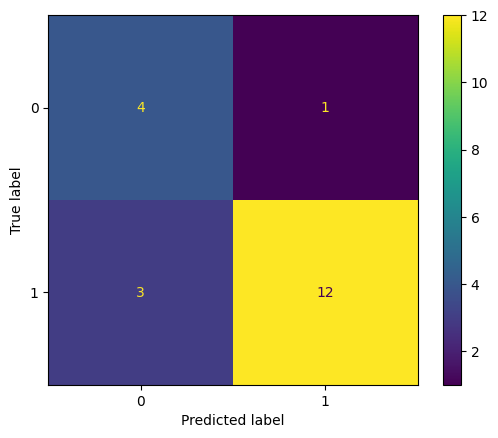

In [823]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [824]:
# put your answer here
acc = accuracy_score(y_test, y_pred)

11. Display the precision

In [825]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8 0.8]


12. Display the recall

In [826]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.57142857 0.92307692]


13. Display the f1-score

In [827]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.66666667 0.85714286]


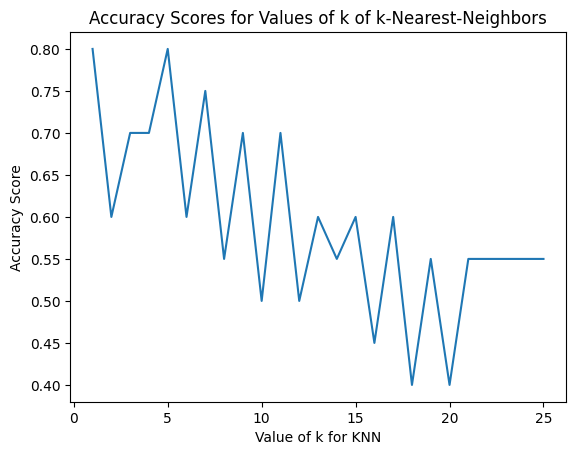

In [828]:
k_range = list(range(1,26))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [829]:
print("ACCURACY: ",acc)
knn.predict([[0, 1, 0, 1000]])

ACCURACY:  0.8


array([0])